### 라이브러리 셋팅

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

# 그래프 출력을 위해 선언합니다.
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

### 데이터 불러오기 (학습데이터, 테스트 데이터)

In [5]:
train = pd.read_csv("basketball_train.csv")
test = pd.read_csv("basketball_test.csv")

In [6]:
train

,Player,Pos,3P,TRB,BLK
0,Denzel Valentine,SG,1.3,2.6,0.1
1,Kyle Korver,SG,2.4,2.8,0.3
2,Troy Daniels,SG,2.1,1.5,0.1
3,Tim Hardaway,SG,1.9,2.8,0.2
4,Dewayne Dedmon,C,0.0,6.5,0.8
...,...,...,...,...,...
75,Victor Oladipo,SG,1.9,4.3,0.3
76,Willie Cauley-Stein,C,0.0,4.5,0.6
77,Brook Lopez,C,1.8,5.4,1.7
78,Josh Richardson,SG,1.4,3.2,0.7


In [7]:
test

,Player,Pos,3P,TRB,BLK
0,JaVale McGee,C,0.0,3.2,0.9
1,Manu Ginobili,SG,1.3,2.3,0.2
2,Nene Hilario,C,0.0,4.2,0.6
3,Evan Fournier,SG,1.9,3.1,0.1
4,Georgios Papagiannis,C,0.0,3.9,0.8
5,Anthony Davis,C,0.5,11.8,2.2
6,Tarik Black,C,0.0,5.1,0.7
7,Jamal Crawford,SG,1.4,1.6,0.2
8,Jordan Clarkson,SG,1.4,3.0,0.1
9,Marcin Gortat,C,0.0,10.4,0.7


In [17]:
train.shape

(80, 5)

In [18]:
test.shape

(20, 5)

### SVM 최적의 파라미터 찾기

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [12]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [{'kernel': ['rbf'],
                       'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
                       'C': [0.01, 0.1, 1, 10, 100, 1000]}]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X_train, y_train.values.ravel())
    print(clf.best_params_)
    
    return clf

In [13]:
X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
# 최적의 파라미터를 sklearn의 gridsearch를 통해 구합니다.
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


### 시각화

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Temp/ipykernel_4868/3085501862.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Temp/ipykernel_4868/3085501862.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X an

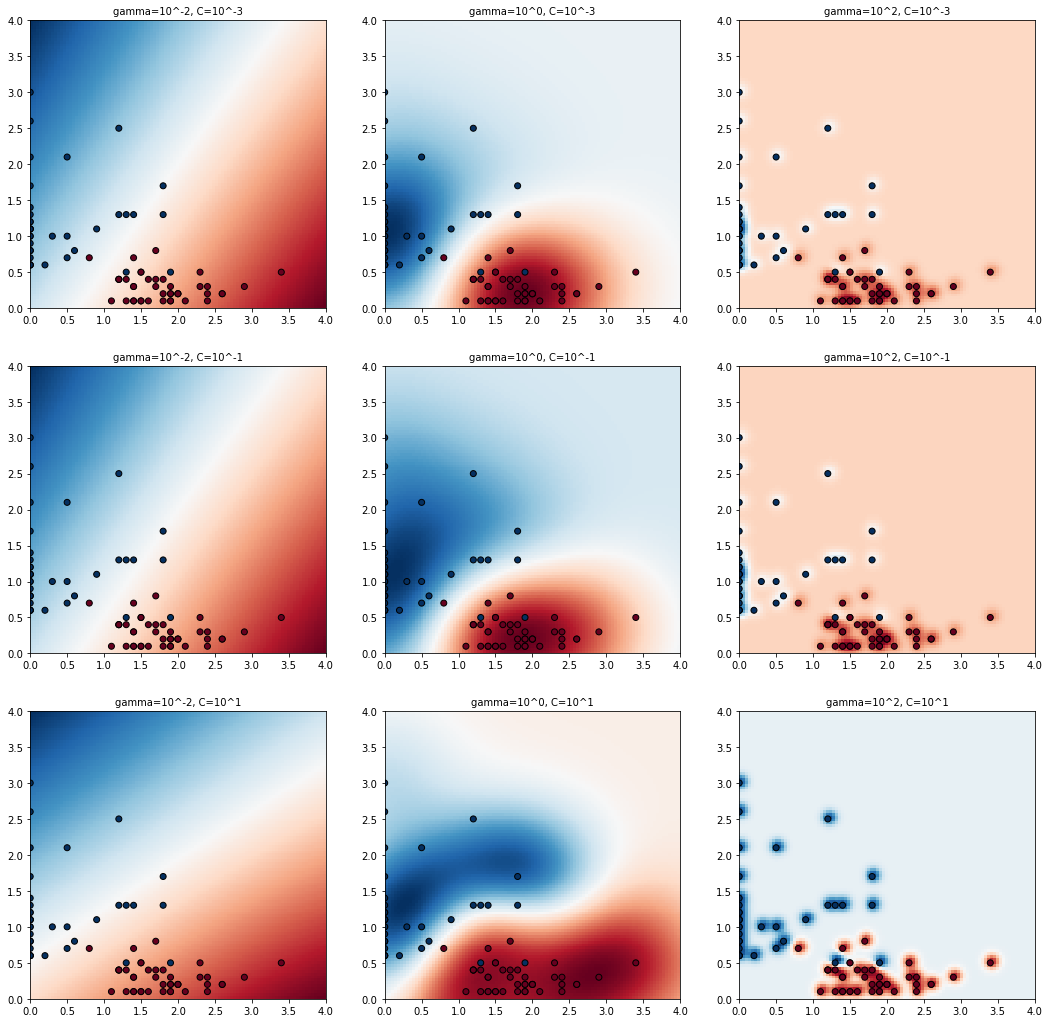

In [14]:
# 시각화를 하기 위해, 최적의 C와 최적의 C를 비교하기 위한 다른 C를 후보로 저장합니다.
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

# 시각화를 하기 위해, 최적의 gamma와 최적의 gamma를 비교하기 위한 다른 gamma를 후보로 저장합니다.
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

# 포지션에 해당하는 문자열 SG와 C를 벡터화합니다.
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

# 각각의 파라미터에 해당하는 SVM 모델을 만들어 classifiers에 저장합니다.
classifiers = []
for C in C_canditates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

# 18,18 사이즈의 챠트를 구성합니다.
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

# 각각의 모델들에 대한 결정 경계 함수를 적용하여 함께 시각화합니다.
for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 최적의 모델을 포함한 다른 파라미터로 학습된 모델들을 함께 시각화해봅니다.
    plt.subplot(len(C_canditates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # 서포트 벡터와 결정경계선을 시각화합니다.
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

### 테스트

In [15]:
# 테스트에 사용될 특징을 지정합니다
X_test = test[['3P', 'BLK']]

# 특징으로 예측할 값 (농구선수 포지션)을 지정합니다
y_test = test[['Pos']]

# 최적의 파라미터로 완성된 SVM에 테스트 데이터를 주입하여, 실제값과 예측값을 얻습니다.
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : "+ str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           C       1.00      0.91      0.95        11
          SG       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20


accuracy : 0.95


In [16]:
# 실제값(ground truth)과 예측값(prediction)이 어느 정도 일치하는 눈으로 직접 비교해봅니다
comparison = pd.DataFrame({'prediction':y_pred, 'ground_truth':y_true.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C
